In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree

# Para realizar la regresión lineal y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error







# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree


# Para realizar la regresión lineal y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


from sklearn.model_selection import KFold,LeaveOneOut, cross_val_score


from sklearn.preprocessing import StandardScaler

from tqdm import tqdm


# Ignorar los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')
import os 
import sys


# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree

# Para realizar la regresión lineal y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


from sklearn.model_selection import KFold,LeaveOneOut, cross_val_score


from sklearn.preprocessing import StandardScaler

from tqdm import tqdm


# Ignorar los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')


sys.path.append(os.path.abspath("../src"))   
import soporte_regresion as f

In [4]:
df_rf=pd.read_csv("..\datos3_mejorado\datos_nulos_encoded.csv", index_col=0).reset_index(drop=True)


In [5]:
x= df_rf.drop(columns="price")
y= df_rf[["price"]]

In [6]:
x_train,x_test,y_train,y_test= train_test_split(x, y, train_size=0.7, random_state=42, shuffle=True)  

Voy a meter los parametros de mi mejor modelo (el de 2000 nodos)  

(max_depth=200,
 max_leaf_nodes=2000,
 min_samples_leaf=10,
min_samples_split=50)

In [7]:
# Definimos un espacio de parámetros para optimizar
params_rf = {
    'n_estimators': [80,100,120],    #número de árboles que queremos que haga
    'max_features': [4,8,10,13],
    'max_depth': [200],
    'min_samples_split': [50],
    'min_samples_leaf': [10], 
    'max_leaf_nodes': [2000]
}

modelo_rf= RandomForestRegressor(random_state=42, bootstrap=True)    #bootstrap es para que haga un muestreo con remplazo (hace que dentro de distintos árboles te pueda coger el mismo dato)
grid_search_rf= GridSearchCV(modelo_rf,
                             params_rf,
                             cv=3,
                             scoring= "neg_mean_squared_error",
                             n_jobs=-1)

grid_search_rf.fit(x_train,y_train["price"].values)   #esta puesto así porque se necesita un array de una dimension
modelo_final_rf= grid_search_rf.best_estimator_
modelo_final_rf

RandomForestRegressor(max_depth=200, max_features=10, max_leaf_nodes=2000,
                      min_samples_leaf=10, min_samples_split=50,
                      n_estimators=120, random_state=42)

In [8]:
y_pred_test_rf=modelo_final_rf.predict(x_test)
y_pred_train_rf=modelo_final_rf.predict(x_train)

In [9]:
pd.options.display.float_format = "{:,.2f}".format   #para la notación

In [10]:
df_metricas_rf= f.metricas(y_train,y_pred_train_rf, y_test , y_pred_test_rf)
df_metricas_rf.T

,r2_score,MAE,MSE,RMSE
train,0.82,"1,606.57","6,491,001.71","2,547.74"
test,0.80,"1,672.40","7,201,795.61","2,683.62"


Aunque RMSE no muestra over fitting el r2 si que lo muestra por ello,

In [11]:
df_importancia=pd.DataFrame(modelo_final_rf.feature_importances_, columns= ["Importancia"], index= x.columns).sort_values(by= "Importancia", ascending=False)
df_importancia

,Importancia
powerCV_est,0.41
kilometer_est,0.25
yearOfRegistration,0.12
brand,0.06
fuelType,0.05
vehicleType,0.05
notRepairedDamage,0.03
gearbox,0.01
monthOfRegistration,0.01
monthCreated,0.00


<Axes: xlabel='Importancia', ylabel='None'>

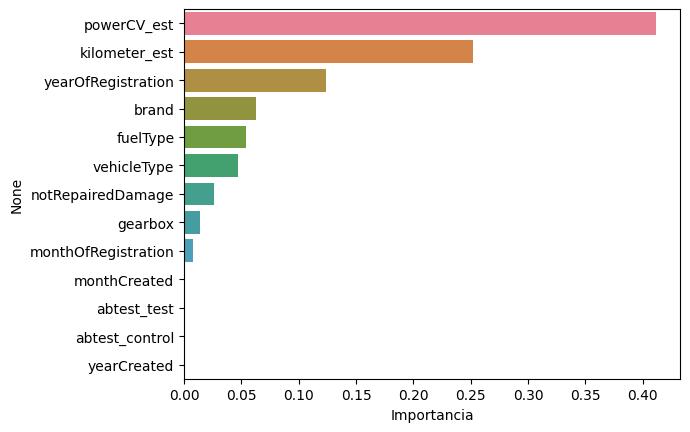

In [12]:
sns.barplot(x="Importancia", y= df_importancia.index, hue=df_importancia.index, data= df_importancia)

No dropeo esas columnas porque me genera mucho Over fitting hacerlo

In [13]:
# x_train_reducida=x_train.drop(columns=["monthCreated","abtest_control","abtest_test","yearCreated"])
# x_test_reducida=x_test.drop(columns=["monthCreated","abtest_control","abtest_test","yearCreated"])


Por lo que hemos podido observar, el mejor modelo es el ofrecido por el Random Forest ya que tiene el mejor equilibrio entre un bajo over fitting y la minimización de los errores.